<a href="https://colab.research.google.com/github/Mrsnellek/MSDS_686_22F8W2/blob/23S8W1/MSDS%20686/Week_4/MNIST_ConvNets_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST ConvNets Example

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Load the MNIST library which is part of [Keras](https://keras.io/datasets/).  MNIST stands for [Modified National Institute of Standards and Technology](https://en.wikipedia.org/wiki/MNIST_database). It is a collection of 60,000 training and 10,000 test images of the digits 0-9. Previously we gained about 98% accuracy in the model.  This time we will introduce convolutional neural networks to improve the model. 

In [ ]:
import matplotlib.pyplot as plt
from keras import backend, models, layers
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Load the MNIST training and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Convert the train and test labels into one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Split the training data into a 75/25 training/validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# Plot the first 9 training samples
for i in range(0, 9):
    plt.subplot(3, 3, 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

## What is a ConvNet and why do we use it?

### A Convolutional Neural Network (ConvNet or CNN) is comprised of one or more convolutional layers (often with a subsampling (" pooling") step) followed by one or more fully connected layers as in a standard multilayer neural network. A CNN learns invariant features (edges, corners, curves, and more complex features deeper in the network!) by convolving regions of the image with a filter whose job is to extract a particular feature. Importantly, these feature filters aren't pre-determined, but instead are learned by the network to help it perform better on the task at hand -- oftentimes image classification.

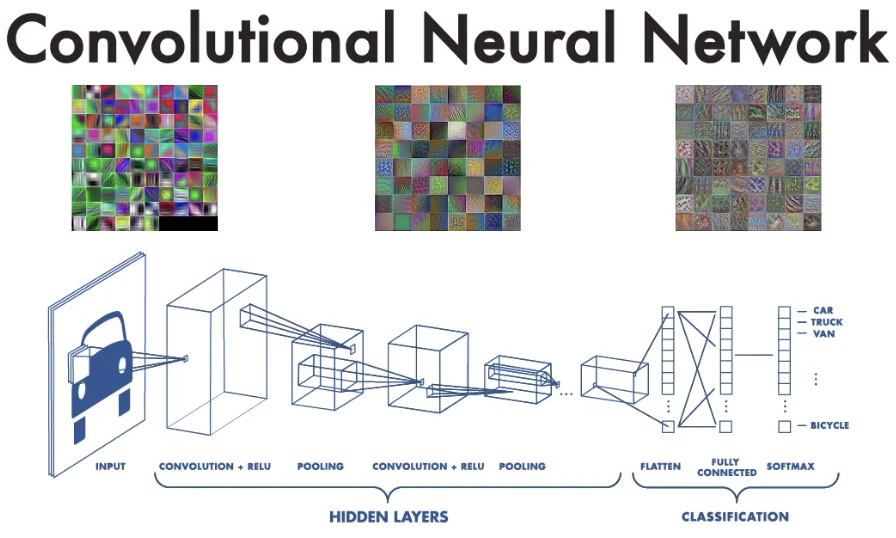

In [ ]:
# Define a function that will build and compile a CNN

def CNN_Base():
  backend.clear_session()
  model = models.Sequential()
  model.add(layers.Rescaling(scale=1./255, input_shape = (28, 28, 1)))
  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model

In [ ]:
# Define a function that plots our standard performance metrics

def plot_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

In [ ]:
# Build/compile our CNN model
model = CNN_Base()

In [ ]:
# Print the model's summary
model.summary()

In [ ]:
# Plot a graphical representation of the CNN's layers
from keras.utils import plot_model
plot_model(model)

In [ ]:
# Fit the model with early termination enabled
history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

In [ ]:
# Plot our performance metrics
plot_history(history)

In [ ]:
# Evaluate the model on the held-out test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)